### Q9 Implement various linear and non linear regression model for continuous dataset prediction using scikit learn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import metrics

In [2]:
df = pd.read_csv(r'placement.csv')

In [3]:
df.head(8)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
5,7.89,2.99
6,6.73,2.60
7,6.75,2.48


Text(0, 0.5, 'Package(in lpa)')

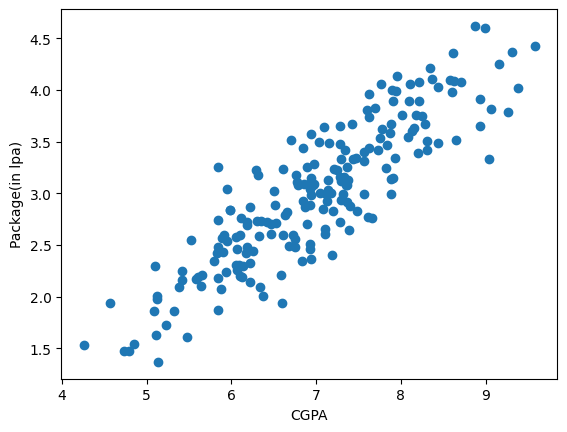

In [4]:
plt.scatter(df['cgpa'],df['package'])
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [5]:
X = df.iloc[:,0:1]
y = df.iloc[:,-1]

In [6]:
type(y)

pandas.core.series.Series

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
def performance(y_test, y_predicted):
    mae = metrics.mean_absolute_error(y_test, y_predicted)
    mse = metrics.mean_squared_error(y_test, y_predicted)
    r2 = metrics.r2_score(y_test, y_predicted)

    print("The model performance for testing set")
    print("--------------------------------------")
    print('MAE is {}'.format(mae))
    print('MSE is {}'.format(mse))
    print('R2 score is {}'.format(r2))

In [9]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_predicted=lr.predict(X_test)
performance(y_test, y_predicted)

The model performance for testing set
--------------------------------------
MAE is 0.2884710931878175
MSE is 0.12129235313495527
R2 score is 0.780730147510384


In [10]:
lr.predict(X_test.iloc[0].values.reshape(1,1))

/home/asif/.local/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.89111601])

Text(0, 0.5, 'Package(in lpa)')

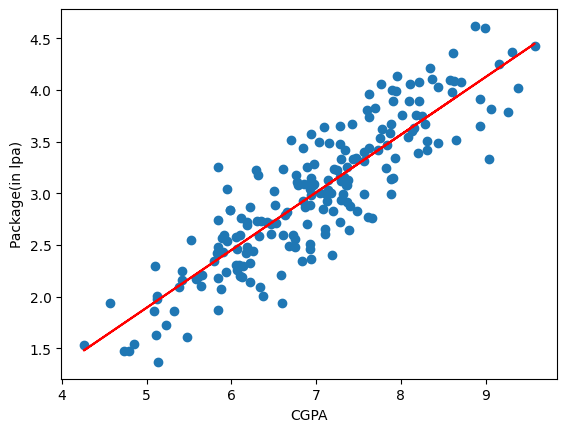

In [11]:
plt.scatter(df['cgpa'],df['package'])
plt.plot(X_train,lr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [12]:
m = lr.coef_
m

array([0.55795197])

In [13]:
b = lr.intercept_
b

-0.8961119222429144

In [14]:
# y = mx + b

m * 8.58 + b

array([3.89111601])

In [15]:
m * 9.5 + b

array([4.40443183])

In [16]:
m * 100 + b

array([54.89908542])

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
poly_features = PolynomialFeatures(degree=5)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)
pr = LinearRegression()
pr.fit(X_train_poly,y_train)
y_predicted=pr.predict(X_test_poly)
performance(y_test, y_predicted)


The model performance for testing set
--------------------------------------
MAE is 0.2921191181105959
MSE is 0.12553434749096462
R2 score is 0.7730615562705964


Text(0, 0.5, 'Package(in lpa)')

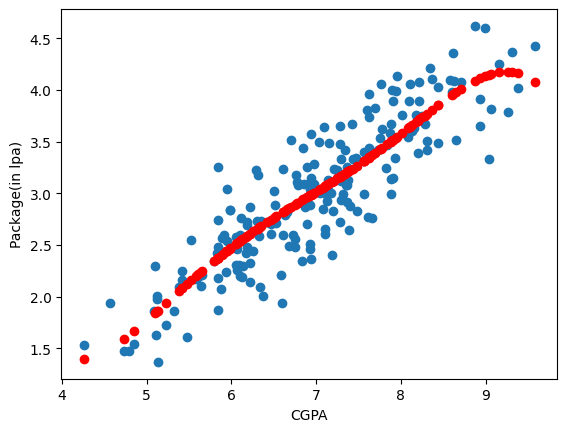

In [29]:
plt.scatter(df['cgpa'],df['package'])
plt.scatter(X_train,pr.predict(X_train_poly),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [19]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
y_predicted=svr.predict(X_test)
performance(y_test, y_predicted)

The model performance for testing set
--------------------------------------
MAE is 0.2951826040245443
MSE is 0.12615320437359695
R2 score is 0.7719427993674634


Text(0, 0.5, 'Package(in lpa)')

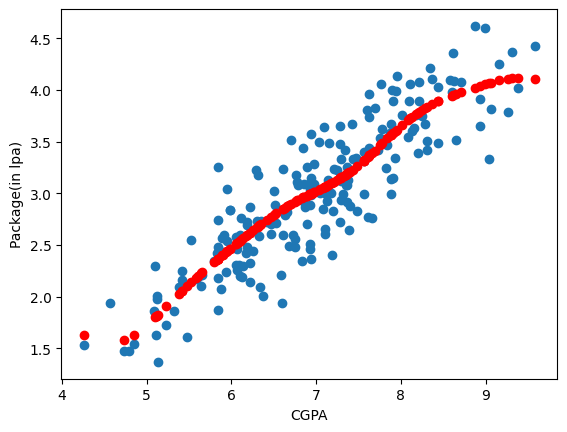

In [26]:
plt.scatter(df['cgpa'],df['package'])
plt.scatter(X_train,svr.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [21]:
from sklearn.neighbors import KNeighborsRegressor
KNR=KNeighborsRegressor()
KNR.fit(X_train,y_train)
y_predicted=KNR.predict(X_test)
performance(y_test, y_predicted)

The model performance for testing set
--------------------------------------
MAE is 0.3177
MSE is 0.14579699999999995
R2 score is 0.7364311446092688


Text(0, 0.5, 'Package(in lpa)')

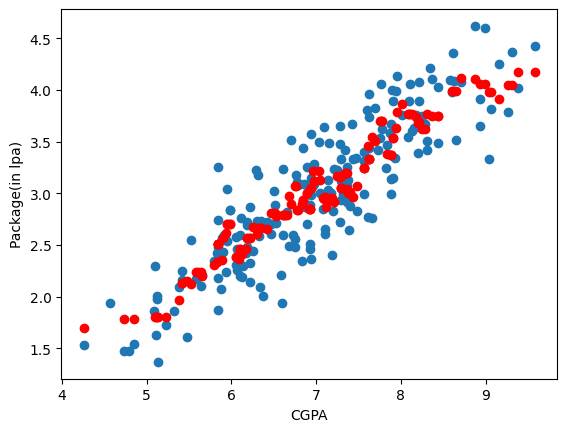

In [25]:
plt.scatter(df['cgpa'],df['package'])
plt.scatter(X_train,KNR.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [23]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
y_predicted=DTR.predict(X_test)
performance(y_test, y_predicted)

The model performance for testing set
--------------------------------------
MAE is 0.37383333333333335
MSE is 0.21500111111111112
R2 score is 0.6113253581123687


Text(0, 0.5, 'Package(in lpa)')

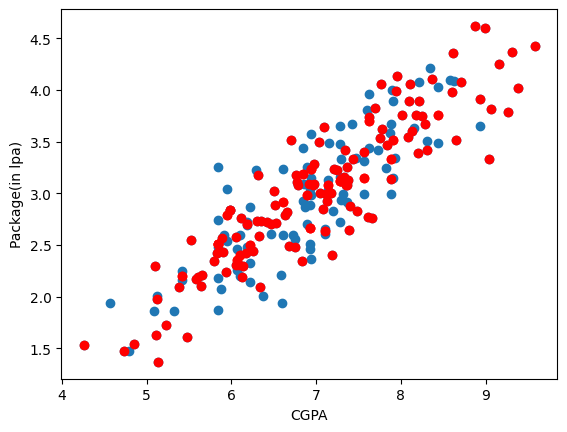

In [24]:
plt.scatter(df['cgpa'],df['package'])
plt.scatter(X_train,DTR.predict(X_train),color='red')
plt.xlabel('CGPA')
plt.ylabel('Package(in lpa)')

In [30]:
plt.plot?